In [212]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, LeakyReLU, Softmax, Dropout, GRU
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, History, ModelCheckpoint
from keras.optimizers import Adam, RMSprop
import tensorflow as tf
import os
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error, r2_score

In [213]:
sequences = np.load('seq_labels/sequences_pose_all.npy')
labels = np.load('seq_labels/labels_pose_all.npy')
# actions = np.array(['goodbye', 'hi', 'you', 'me', 'thankyou', 'goodmorning'])
# actions = np.array(['come', 'good', 'happy', 'home', 'iloveyou', 'sorry'])
actions = np.array(['come', 'good', 'goodbye', 'goodmorning', 'happy', 'hi', 'home', 'iloveyou', 'me', 'sorry', 'thankyou', 'you'])

In [214]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [215]:
xtrain, xrem, ytrain, yrem = train_test_split(X, y, test_size=0.3)

xval, xtest, yval, ytest = train_test_split(xrem, yrem, test_size=0.5)

# xtrain = np.load('data_all/xtrain.npy')
# ytrain = np.load('data_all/ytrain.npy')
# xval = np.load('data_all/xval.npy')
# yval = np.load('data_all/yval.npy')
# xtest = np.load('data_all/xtest.npy')
# ytest = np.load('data_all/ytest.npy')

# xtrain = np.load('data_2/xtrain.npy')
# ytrain = np.load('data_2/ytrain.npy')
# xval = np.load('data_2/xval.npy')
# yval = np.load('data_2/yval.npy')
# xtest = np.load('data_2/xtest.npy')
# ytest = np.load('data_2/ytest.npy')

# xtrain = np.load('data_1/xtrain.npy')
# ytrain = np.load('data_1/ytrain.npy')
# xval = np.load('data_1/xval.npy')
# yval = np.load('data_1/yval.npy')
# xtest = np.load('data_1/xtest.npy')
# ytest = np.load('data_1/ytest.npy')

# xtrain = np.load('data_all_a/xtrain.npy')
# ytrain = np.load('data_all_a/ytrain.npy')
# xval = np.load('data_all_a/xval.npy')
# yval = np.load('data_all_a/yval.npy')
# xtest = np.load('data_all_a/xtest.npy')
# ytest = np.load('data_all_a/ytest.npy')

In [216]:
# np.save('data_all_a/xtrain.npy',xtrain)
# np.save('data_all_a/xval.npy',xval)
# np.save('data_all_a/xtest.npy',xtest)
# np.save('data_all_a/ytrain.npy',ytrain)
# np.save('data_all_a/yval.npy',yval)
# np.save('data_all_a/ytest.npy',ytest)

In [217]:
file_name = 'all_gru_please_help_me'

In [218]:
# np.random.seed(42)
tf.random.set_seed(42)
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
checkpoint_callback = ModelCheckpoint(f'islr_{file_name}.h5', monitor='val_loss', save_best_only=True)
history = History()

In [219]:
callback = EarlyStopping(monitor='val_loss', patience=7, start_from_epoch = 80)

In [220]:
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, input_shape=(30, 258)))
# model.add(LeakyReLU())
# model.add(Dropout(0.4))
# model.add(LSTM(128, return_sequences=True))
# model.add(LeakyReLU())
# model.add(LSTM(64, return_sequences=False))
# model.add(LeakyReLU())
# model.add(Dense(64))
# model.add(LeakyReLU())
# model.add(Dense(32))
# model.add(LeakyReLU())
# model.add(Dense(actions.shape[0]))
# model.add(Softmax())

model = Sequential()
model.add(GRU(64, return_sequences=True, input_shape=(30, 258)))
model.add(LeakyReLU())
model.add(Dropout(0.4))
model.add(GRU(128, return_sequences=True))
model.add(LeakyReLU())
model.add(GRU(64, return_sequences=False))
model.add(LeakyReLU())
model.add(Dense(64))
model.add(LeakyReLU())
model.add(Dense(32))
model.add(LeakyReLU())
model.add(Dense(actions.shape[0]))
model.add(Softmax())

In [221]:
model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [222]:
history = model.fit(xtrain, ytrain, epochs=100, callbacks=[tb_callback, callback, history, checkpoint_callback], batch_size=32, validation_data=(xval, yval))

Epoch 1/100
36/36 [==============================] - 13s 157ms/step - loss: 2.3089 - categorical_accuracy: 0.1709 - val_loss: 2.0698 - val_categorical_accuracy: 0.2398
Epoch 2/100
36/36 [==============================] - 3s 91ms/step - loss: 1.8792 - categorical_accuracy: 0.2903 - val_loss: 1.8128 - val_categorical_accuracy: 0.3130
Epoch 3/100
36/36 [==============================] - 4s 116ms/step - loss: 1.6913 - categorical_accuracy: 0.2895 - val_loss: 1.7461 - val_categorical_accuracy: 0.3293
Epoch 4/100
36/36 [==============================] - 4s 121ms/step - loss: 1.6321 - categorical_accuracy: 0.3374 - val_loss: 1.6551 - val_categorical_accuracy: 0.3496
Epoch 5/100
36/36 [==============================] - 4s 101ms/step - loss: 1.5265 - categorical_accuracy: 0.3601 - val_loss: 1.5236 - val_categorical_accuracy: 0.3537
Epoch 6/100
36/36 [==============================] - 3s 97ms/step - loss: 1.4454 - categorical_accuracy: 0.3627 - val_loss: 1.3739 - val_categorical_accuracy: 0.4919

In [226]:
model.load_weights(f'islr_{file_name}.h5')
# model.load_weights(f'islr_all_gru_6.h5')

In [227]:
train_loss, train_acc = model.evaluate(xtrain, ytrain)
print('Train accuracy: ', train_acc)
print('Train loss: ', train_loss)

36/36 [==============================] - 1s 22ms/step - loss: 0.0150 - categorical_accuracy: 0.9965
Train accuracy:  0.9965126514434814
Train loss:  0.015019701793789864


In [228]:
val_loss, val_acc = model.evaluate(xval, yval)
print('Val accuracy: ', val_acc)
print('Val loss: ', val_loss)

8/8 [==============================] - 0s 33ms/step - loss: 0.1438 - categorical_accuracy: 0.9715
Val accuracy:  0.9715447425842285
Val loss:  0.14377440512180328


In [229]:
test_loss, test_acc = model.evaluate(xtest, ytest)

8/8 [==============================] - 0s 19ms/step - loss: 0.1611 - categorical_accuracy: 0.9634


In [230]:
print('Test accuracy: ', test_acc)
print('Test loss: ', test_loss)

Test accuracy:  0.9634146094322205
Test loss:  0.16111184656620026


In [231]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_27 (GRU)                (None, 30, 64)            62208     
                                                                 
 leaky_re_lu_45 (LeakyReLU)  (None, 30, 64)            0         
                                                                 
 dropout_9 (Dropout)         (None, 30, 64)            0         
                                                                 
 gru_28 (GRU)                (None, 30, 128)           74496     
                                                                 
 leaky_re_lu_46 (LeakyReLU)  (None, 30, 128)           0         
                                                                 
 gru_29 (GRU)                (None, 64)                37248     
                                                                 
 leaky_re_lu_47 (LeakyReLU)  (None, 64)               

In [232]:
model.save(f'islr_{file_name}a.h5')

In [233]:
ypred = model.predict(xtest)

8/8 [==============================] - 2s 21ms/step


In [234]:
ytrue = np.argmax(ytest, axis=1).tolist()
ypred = np.argmax(ypred, axis=1).tolist()

In [235]:
cm = confusion_matrix(ytrue,ypred)

In [236]:
cm

array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 19,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  1,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0, 20,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 15,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 24]])

In [237]:
cm_df = pd.DataFrame(cm,
                     index = actions, 
                     columns = actions)

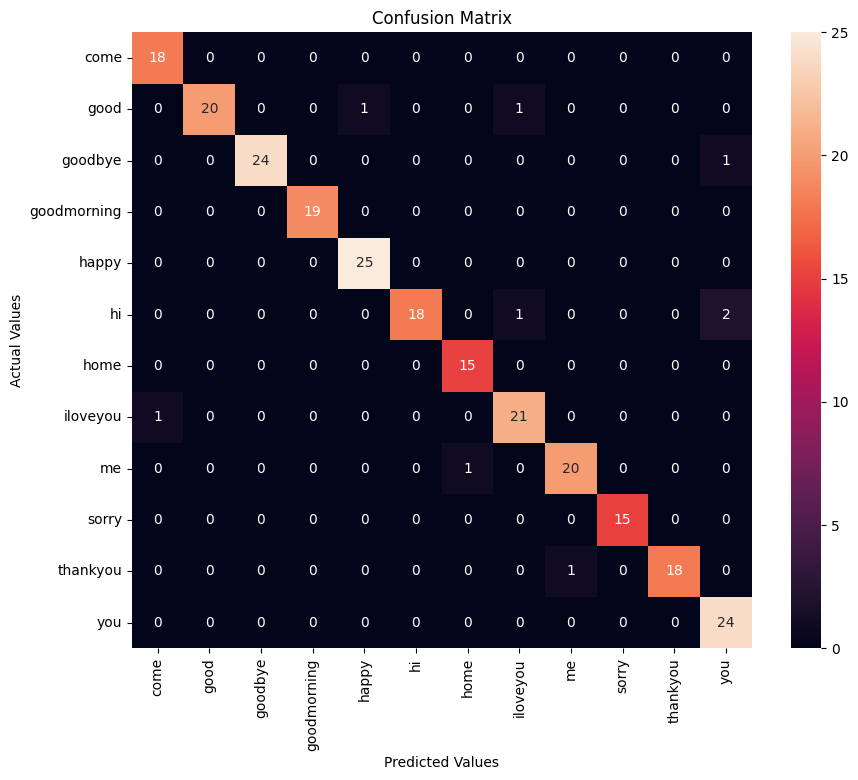

In [238]:
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig(f'graphs/conf_matrix_{file_name}.png')
plt.show()

In [239]:
mcm1 = multilabel_confusion_matrix(ytrue, ypred)
print(mcm1)

[[[227   1]
  [  0  18]]

 [[224   0]
  [  2  20]]

 [[221   0]
  [  1  24]]

 [[227   0]
  [  0  19]]

 [[220   1]
  [  0  25]]

 [[225   0]
  [  3  18]]

 [[230   1]
  [  0  15]]

 [[222   2]
  [  1  21]]

 [[224   1]
  [  1  20]]

 [[231   0]
  [  0  15]]

 [[227   0]
  [  1  18]]

 [[219   3]
  [  0  24]]]


In [240]:
acc = accuracy_score(ytrue, ypred)
rec_w = recall_score(ytrue, ypred, average = 'weighted')
rec_n = recall_score(ytrue, ypred, average = None)
pre_w = precision_score(ytrue, ypred, average = 'weighted')
pre_n = precision_score(ytrue, ypred, average = None)
f1_w = f1_score(ytrue, ypred, average = 'weighted')
f1_n = f1_score(ytrue, ypred, average = None)


print('Accuracy: ', round(acc, 3))
print('Recall (weighted): ', round(rec_w, 3))
print('Precision (weighted): ', round(pre_w, 3))
print('F1 score (weighted): ', round(f1_w, 3))

print('Recall : ', [round(x, 3) for x in rec_n])
print('Precision : ', [round(x, 3) for x in pre_n])
print('F1 score : ', [round(x, 3) for x in f1_n])


Accuracy:  0.963
Recall (weighted):  0.963
Precision (weighted):  0.966
F1 score (weighted):  0.963
Recall :  [1.0, 0.909, 0.96, 1.0, 1.0, 0.857, 1.0, 0.955, 0.952, 1.0, 0.947, 1.0]
Precision :  [0.947, 1.0, 1.0, 1.0, 0.962, 1.0, 0.938, 0.913, 0.952, 1.0, 1.0, 0.889]
F1 score :  [0.973, 0.952, 0.98, 1.0, 0.98, 0.923, 0.968, 0.933, 0.952, 1.0, 0.973, 0.941]


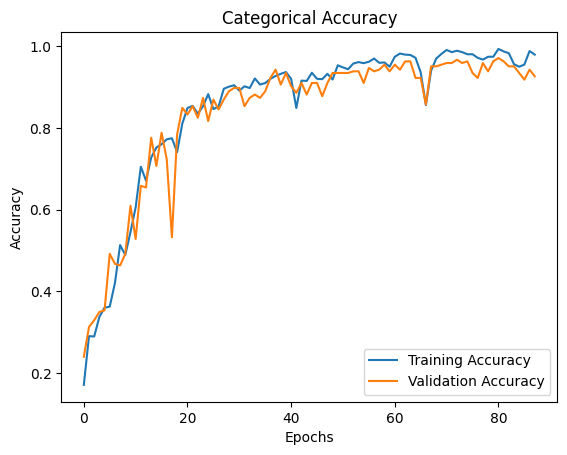

In [253]:
plt.plot(history.history['categorical_accuracy'],label='Training Accuracy')
plt.plot(history.history['val_categorical_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Categorical Accuracy')
plt.legend()
# plt.savefig(f'graphs/accuracy_{file_name}.png')
plt.show()

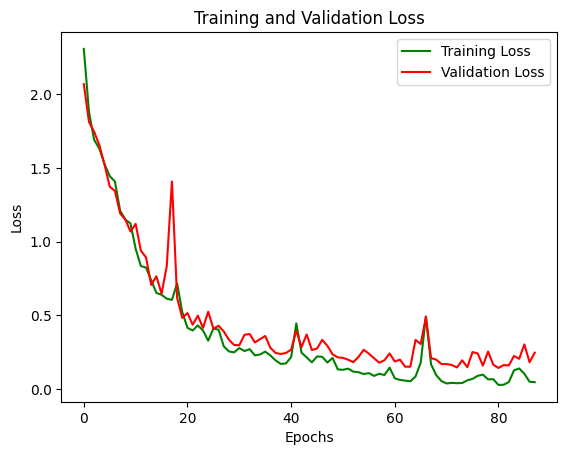

In [254]:
plt.plot(history.history['loss'], color= 'green',label='Training Loss')
plt.plot(history.history['val_loss'], color= 'red', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# plt.savefig(f'graphs/loss_{file_name}.png')
plt.show()

In [243]:
ep = len(history.history['loss'])
print('Epochs: ', ep)

Epochs:  88


In [244]:
pd.DataFrame(history.history).to_csv(f'graphs/history_{file_name}.csv')

In [245]:
history.history['val_loss']

[2.0698416233062744,
 1.8127962350845337,
 1.7461472749710083,
 1.6550967693328857,
 1.5235880613327026,
 1.373913288116455,
 1.3449708223342896,
 1.1930757761001587,
 1.151279330253601,
 1.0697112083435059,
 1.1215640306472778,
 0.9401702284812927,
 0.8942773342132568,
 0.7074595093727112,
 0.7659407258033752,
 0.6475933194160461,
 0.8339663743972778,
 1.408919095993042,
 0.6191376447677612,
 0.4833678901195526,
 0.51605224609375,
 0.4375826120376587,
 0.4985576868057251,
 0.4157599210739136,
 0.5257019400596619,
 0.40999963879585266,
 0.43025535345077515,
 0.3913950026035309,
 0.33533263206481934,
 0.2996187210083008,
 0.2976323366165161,
 0.3689315617084503,
 0.3745117783546448,
 0.3167317807674408,
 0.3394761085510254,
 0.3608277440071106,
 0.2799742817878723,
 0.24538613855838776,
 0.23858386278152466,
 0.24528218805789948,
 0.26808327436447144,
 0.39660245180130005,
 0.2851356863975525,
 0.37112608551979065,
 0.2652430832386017,
 0.27540966868400574,
 0.3342393934726715,
 0.29345

In [248]:
top1_acc = np.mean(np.argmax(model.predict(xval), axis=1) == np.argmax(yval, axis=1))
print('Top-1 accuracy:', top1_acc)

k=3
topk_acc = np.mean(np.any(np.argsort(model.predict(xval), axis=1)[:, -k:] == np.argmax(yval, axis=1).reshape(-1, 1), axis=1))
print(f'Top-{k} accuracy:', topk_acc)

8/8 [==============================] - 0s 16ms/step
Top-1 accuracy: 0.9715447154471545
8/8 [==============================] - 0s 15ms/step
Top-3 accuracy: 0.9959349593495935


In [250]:
from sklearn.metrics import classification_report
print(classification_report(ytrue, ypred, target_names=actions))

              precision    recall  f1-score   support

        come       0.95      1.00      0.97        18
        good       1.00      0.91      0.95        22
     goodbye       1.00      0.96      0.98        25
 goodmorning       1.00      1.00      1.00        19
       happy       0.96      1.00      0.98        25
          hi       1.00      0.86      0.92        21
        home       0.94      1.00      0.97        15
    iloveyou       0.91      0.95      0.93        22
          me       0.95      0.95      0.95        21
       sorry       1.00      1.00      1.00        15
    thankyou       1.00      0.95      0.97        19
         you       0.89      1.00      0.94        24

    accuracy                           0.96       246
   macro avg       0.97      0.97      0.96       246
weighted avg       0.97      0.96      0.96       246



In [251]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(ytrue, ypred, average='weighted')

(0.9657474917580544, 0.9634146341463414, 0.9633101375473225, None)